#Objective - Create a scatterplot

### Let's start with an example:



Anyone who is a fan of detective TV shows has watched a scene where human remains are discovered and some sort of expert is called in to determine when the person died. But is this science fiction or science fact? Is it possible to use evidence from skeletal remains to determine how long a body has been buried (a decent approximation of how long the person has been dead)?




Researchers sampled long bone material from bodies exhumed from coffin burials in two cemeteries in England. In each case, date of death and burial (and therefore interment time) was known. This data is given in the Longbones.csv dataset.

**We wish to determine if there is a relationship between the nitrogen composition of the long bones of the skeleton and the length of time the body was interred.**

Source: D.R. Jarvis (1997). "Nitrogen Levels in Long Bones from Coffin Burials Interred for Periods of 26-90 Years," Forensic Science International, Vol85, pp199-208

Site,Time,Depth,Lime,Age,Nitro,Oil
1,88.5,7,1,NA,3.88,1
1,88.5,NA,1,NA,4,1
1,85.2,7,1,NA,3.69,1
1,71.8,7.6,1,65,3.88,0
1,70.6,7.5,1,42,3.53,0
1,68,7,1,28,3.93,0
1,71.6,8,1,35,3.88,0
1,70.2,6,1,44,3.64,0
1,55.5,6,0,29,3.97,0
1,36.5,6.5,0,NA,3.85,0
1,36.3,6.5,0,48,3.96,0
1,46.5,6.5,0,35,3.69,0
1,35.9,6.5,0,NA,3.76,0
1,45.5,6.5,0,34,3.75,0
1,43,6.5,0,38,3.75,0
1,44.9,6.5,0,27,3.92,0
1,59.5,8,0,26,3.76,0
1,58.3,8,0,23,3.93,0
1,56.5,8,0,35,3.7,0
1,56.3,8,0,23,3.82,0
1,43,6.5,0,40,3.78,0
1,42.5,9,0,31,4,0
1,29,7.5,0,31,3.92,0
1,35.3,8.5,0,39,3.79,0
2,93.6,4,1,39,3.49,0
2,90,4,1,43,3.57,0
2,88,5.5,1,26,3.43,0
2,84.4,5,1,NA,3.55,0
2,84,4.75,1,NA,3.5,0
2,79.7,4.75,1,47,3.27,0
2,67.4,4.5,1,39,3.66,0
2,64.7,5,1,27,3.9,0
2,64.7,5.5,1,35,3.91,0
2,38.3,7,0,21,3.73,0
2,59.6,9.25,0,46,3.72,0
2,32,9,0,24,3.85,0
2,32.2,9,0,27,3.85,0
2,26.5,7,0,34,4.06,0
2,34.7,8.5,0,30,4.04,0
2,27.6,6,0,22,4,0
2,35.7,9,0,19,3.93,0
2,49.6,9,0,50,3.85,0

In [4]:
#Import the Longbones.csv dataset from a URL and print the first few rows
#Save the above dataset
import pandas as pd
import numpy as np
from google.colab import files
upload=files.upload()
df = pd.read_csv("Longestbones.csv")
df.head()



Saving Longestbones.csv to Longestbones.csv


,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,88.5,7.0,1,NaN,3.88,1
1,1,88.5,NaN,1,NaN,4.00,1
2,1,85.2,7.0,1,NaN,3.69,1
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0


The two variables we are interested in - for now - are

- Nitro, the amount of nitrogren present in the long bones of the skeleton measured in g/100g of bone
- Time, the interment time of the body

Simple linear regression and correlation measure the *linear* relationship between two quantitative variables.

#Objective - Identify the independent and dependent variables in a relationship

Each of the two variables has a unique role in the relationship.
- The dependent variable (also known as the target, response or y variable) is the focus of our research question or experiment.  It is the variable we expect to change in response to the independent variable.
- The independent variable (also known as a feature, explanatory or x variable) is used to predict change in the dependent variable.

In this case, because we want to try to use the nitrogen composition of the long bones of the skeleton to predict the amount of time the body has been buried, **nitrogen is the explanatory (independent variable / feature) variable and interrment time is the response / target / dependent variable**.

The classic visualization to show the relationship between two quantitative variables is called a scatterplot.

In a scatterplot, we plot the value of the indepdendent variable and the value of the dependent variable as an (x,y) pair.  

For example, the first observation would be plotted by moving right on the x-axis to 3.88 and up along the y-axis direction to 88.5.

By convention, your dependent variable (target) is going to be on the y-axis. The x-axis will contain your independent variable (feature).

In [5]:
df.head(2)

,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,88.5,7.0,1,NaN,3.88,1
1,1,88.5,NaN,1,NaN,4.00,1


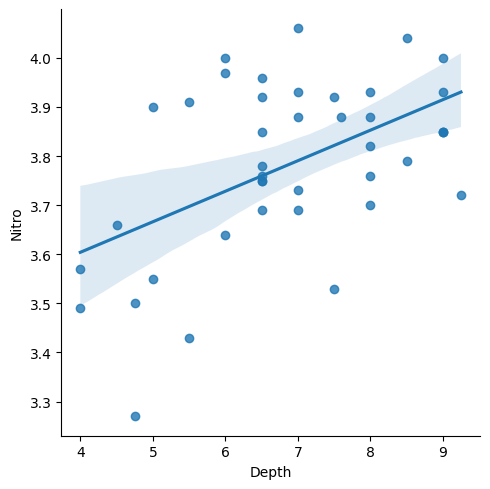

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#write your code here
#sns.lmplot
sns.lmplot(x="Depth",y="Nitro",data=df)
plt.show();

From the scatterplot we can see that there is - maybe - a negative relationship between the amount of nitrogen still remaining in the long bones of the skeleton and the length of time the skeleton has been buried.

Before we get too much farther, let's take a look at the data and see if we need to do any additional data cleaning

In [ ]:
#This is a short dataset so we can just print it out look for missing data.
# print (df)

First, the age of the individual at the time of death was unknown in several cases.  

It is good practice to eliminate (or impute - but we'll save that for later) missing data before building a regression model.  Even though all of the records for nitgrogen composition and interment time are complete, later we will want to be able to include age as an independent predictor, and it is missing for some records.

When we build a regression model, it is always important to build it using the same individuals every time.  It's not fair to compare the fit of a model with fewer variables and more observations to a model with more variables and fewer observations (because some of those other variables include missing data).

There is also a variable called Oil that indicates if the burial site was contaminated with fuel oil.  The study authors decided to remove those observations from their analysis because they were concerned that the oil contamination would change the natural relationship between nitrogen composition and interment time.

We can print these observations in a different color on our scatterplot to see if they fall in the general pattern of - or away from the pattern of - the overall relationship between long bone nitrogen compostion and interment time.

In [13]:
# df.head(2)
df.head(2)

,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,88.5,7.0,1,NaN,3.88,1
1,1,88.5,NaN,1,NaN,4.00,1


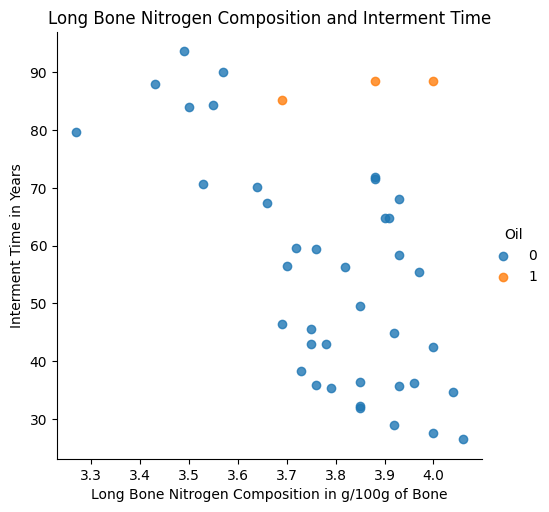

In [7]:
sns.lmplot(data=df, x='Nitro', y='Time', hue='Oil', ci=None, fit_reg=False)

plt.title('Long Bone Nitrogen Composition and Interment Time')
plt.xlabel('Long Bone Nitrogen Composition in g/100g of Bone')
plt.ylabel('Interment Time in Years')

plt.show();

Because there is a biological reason that oil contamination might obscure the true relationship between long bone nitrogen composition and interrment time, we will remove those observations from our dataset before we begin analyses.

Note that the three oil contaminated gravesites will be removed from the data when we remove the observations with a missing age or burial depth.

Something to point out here - data cleaning isn't only about removing missing data.  Sometimes we don't want to remove records with missing data because they are communicating important information, and sometimes we want to remove other records for reasons related to the subject matter - as in the case with removing the observations that were contaminated with fuel oil.

In [9]:
#Drop records with NAs and rename the dataset longbones
print ('Number of samples before dropping null values, n:', len(df))
# longbones = #drop null values
longbones=df.dropna()
print ('Number of samples after dropping null values, n:', len(longbones))

Number of samples before dropping null values, n: 42
Number of samples after dropping null values, n: 35


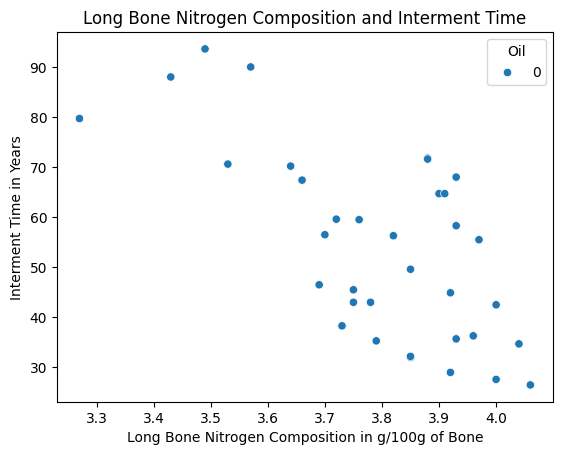

In [14]:
#Let's look at the scatterplot with the cleaned data.
import matplotlib.pyplot as plt
import seaborn as sns
#x = 'Nitro', y = 'Time', hue='Oil', data=longbones ---plot
sns.scatterplot(x="Nitro",y="Time",hue="Oil",data=longbones)

plt.title('Long Bone Nitrogen Composition and Interment Time')
plt.xlabel('Long Bone Nitrogen Composition in g/100g of Bone')
plt.ylabel('Interment Time in Years')

plt.show()

There appears to be a negative association between long bone nitrogen compostiion and interment time. Smaller  long bone nitrogen composition = longer interment time and vice versa.

But is there a relationship between these two variables?  If so, how strong it is?

#Objective - Calculate and interpret linear correlation

The linear correlation coefficient (r) measures the strength and direction of the linear relationship between two quantiatative variables.


- Correlation is measured on a scale of - 1 to 1.  - 1 = perfect negative correlation, 1 = perfect positive correlation, 0 = no correlation
- Correlation has no units
- The correlation of x with y is equal to the correlation of y with x
- A correlation |r| > 0.80 is considered strong and a correlation |r| < 0.20 is considered weak.







np.corrcoef gives us more information than we actually need *for now*.

linear correlation between nitrogen composition and interrment time is _________?

Correlation gives us a measure of how related two quantiative variables are. However, we'd like to go one step further and see if we can use a skeleton's long bone nitrogen composition to estimate how long the body has been buried.

We are going to do this by calculating the least squares regression line (also known as the line of best fit) for the data.



When dealing with real data (as opposed to working with graphs in algebra), the points in a scatterplot will never line up perfectly.  The best model of the relationship between the two variables is the straight line that comes closest to passing through all the points (knowing that it won't actually hit all of them).

The least squares regression line is the line that minimizes the squared distances from every observed point to the regression line.

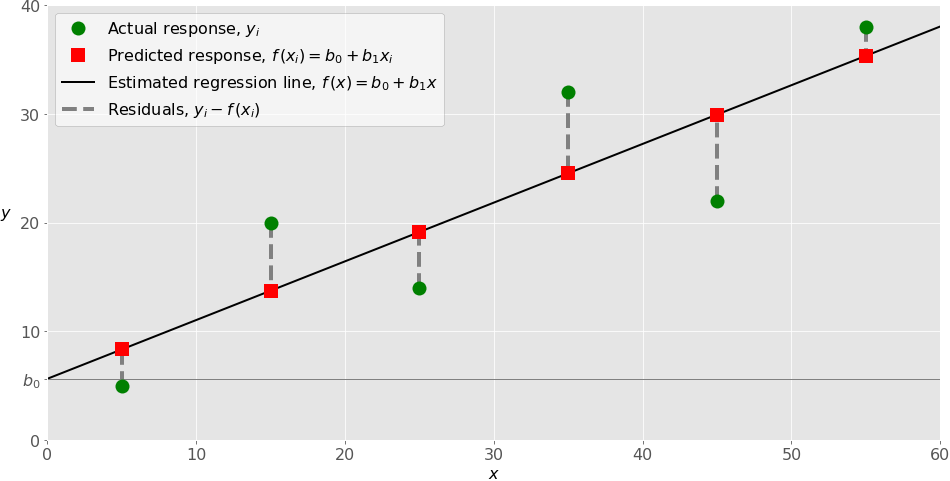

The simple linear regression equation has the form:

\begin{equation}
\hat{Y} = b_1 X + b_0
\end{equation}




#Implement a LinearRegressionModel class from scratch (without sklearn regression models)
For this use dataset : https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression?select=Salary_dataset.csv

Perform all the necessary preprocessing and EDA
then move forward


*   Gradient Descent method

*   Normal Equation method
#Train linear regression using both Gradient Descent and the Normal Equation.
Split the dataset into train/validation (e.g., 80/20, shuffled with a fixed random seed).
Fit on train only and report MSE on validation for both methods.
Create a matplotlib animation of Gradient Descent. Also show the loss curve over epochs.



---

